第一題

In [1]:
import numpy as np
import pandas as pd

raw_data = pd.read_csv("Churn_Modelling.csv")
df = pd.DataFrame(raw_data)
df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

第二題

In [3]:
mean_values = df["EstimatedSalary"].mean()
df["EstimatedSalary"].fillna(value=mean_values, inplace=True)

mode_values_gender = df["Gender"].mode()[0]
mode_values_age = df["Age"].mode()[0]
df["Gender"].fillna(value=mode_values_gender,inplace = True)
df["Age"].fillna(value=mode_values_age,inplace = True)


In [4]:
df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

第三題

In [5]:
df = df.rename(columns={'CredRate': 'CreditScore','ActMem':'IsActiveMember','Prod Number':'NumOfProducts','Exited':'Churn'})
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


第四題

In [6]:
df.drop('CustomerId',axis=1,inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [7]:
df['Geography']=df['Geography'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['HasCrCard']=df['HasCrCard'].astype('category')
df['Churn']=df['Churn'].astype('category')
df['IsActiveMember']=df['IsActiveMember'].astype('category')

In [8]:
df.dtypes#欄位屬性輸出

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [9]:
df.to_csv('Churn_Modelling_new.csv', encoding = 'utf-8-sig',index=False) #輸出新csv

第五題

In [10]:
group_sizes_HasCrCard = df.groupby('HasCrCard').size()
print('有信用卡的人比例:', group_sizes_HasCrCard.iloc[1]/df.shape[0])
print('無信用卡的人比例:', group_sizes_HasCrCard.iloc[0]/df.shape[0])
#5-1

有信用卡的人比例: 0.7055
無信用卡的人比例: 0.2945


In [11]:
group_sizes_Churn = df.groupby('Churn').size()
print('流失的客戶比例:', group_sizes_Churn.iloc[1]/df.shape[0])
#5-2

流失的客戶比例: 0.2037


In [12]:
group_sizes_IsActiveMember = df.groupby('IsActiveMember').size()
print('仍是活躍狀態的客戶比例:', group_sizes_IsActiveMember.iloc[1]/df.shape[0])
#5-3

仍是活躍狀態的客戶比例: 0.5151


In [13]:
no_churn_df = (df["Churn"]==0)#5-4
has_churn_df=(df["Churn"]==1)

In [14]:
df.loc[no_churn_df].mean()

CreditScore          651.853196
Age                   37.411277
Tenure                 5.033279
Balance            72745.296779
NumOfProducts          1.544267
HasCrCard              0.707146
IsActiveMember         0.554565
EstimatedSalary    99718.932023
Churn                  0.000000
dtype: float64

In [15]:
df.loc[has_churn_df].mean()

CreditScore           645.351497
Age                    44.837997
Tenure                  4.932744
Balance             91108.539337
NumOfProducts           1.475209
HasCrCard               0.699067
IsActiveMember          0.360825
EstimatedSalary    101465.677531
Churn                   1.000000
dtype: float64

In [16]:
#5-5
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


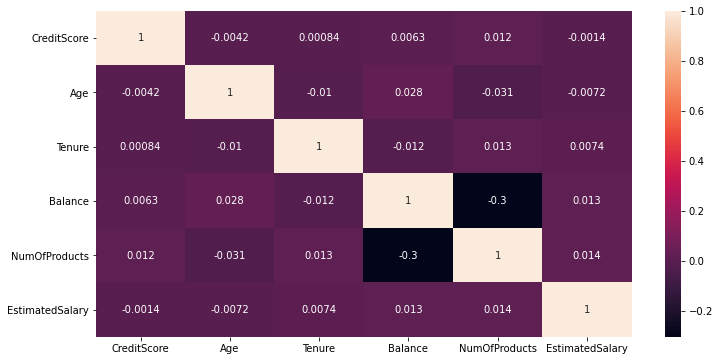

In [17]:
import seaborn as sns#5-5
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

第六題

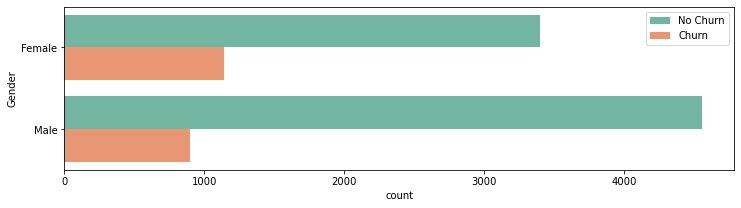

In [18]:
fig,ax = plt.subplots(figsize = (12,3))
sns.countplot(data = df,hue = df['Churn'],y = df['Gender'],palette='Set2')
plt.legend( labels=['No Churn', 'Churn'])
plt.show()#6-1

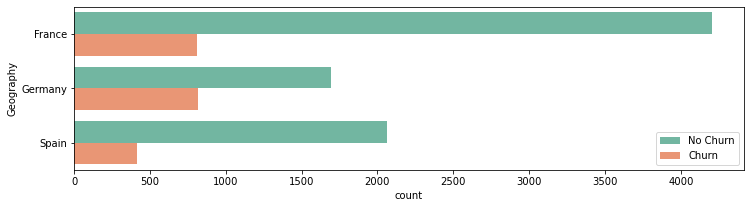

In [19]:

fig,ax = plt.subplots(figsize = (12,3))
sns.countplot(data = df,hue = df['Churn'],y = df['Geography'],palette='Set2')
plt.legend( labels=['No Churn', 'Churn'])
plt.show()


#6-2


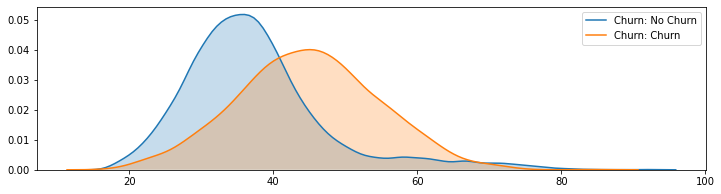

In [20]:
fig,ax = plt.subplots(figsize = (12,3))
sns.kdeplot(df.loc[no_churn_df]['Age'], label= 'Churn: No Churn',shade=True)
sns.kdeplot(df.loc[has_churn_df]['Age'], label= 'Churn: Churn',shade=True)

plt.show()#6-3

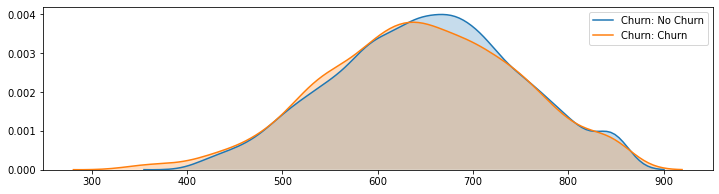

In [21]:
fig,ax = plt.subplots(figsize = (12,3))
sns.kdeplot(df.loc[no_churn_df]['CreditScore'], label= 'Churn: No Churn',shade=True)
sns.kdeplot(df.loc[has_churn_df]['CreditScore'], label= 'Churn: Churn',shade=True)

plt.show()#6-4
